Calculator for batch experiments simulation using ASM 1, multi-stage on and off control
1. Model compounds  

| Parameter | Symbol | Typical Value in WWTP | Units |
|:----------|:-------|:----------------------|:------|
| Soluble inert organics|  $S_{I}$ | 30 | g COD/m$^{3}$ |
| Readily biodegradable substrates |  $S_{S}$ | 60 | g COD/m$^{3}$ |
| Inert particulate organics | $X_{I}$ | 25 | g COD/m$^{3}$ |
| Slowly biodegradable substrates | $X_{S}$ | 115 | g COD/m$^{3}$ |
| Heterotrophic biomass | $X_{H}$ | 30 | g /m$^{3}$ |
| Autotrophic, nitrifying biomass | $X_{A}$ | >0 | g /m$^{3}$ |
| Particulate pruducts arising from biomass decay | $X_{P}$ | >0 | g COD/m$^{3}$ |
| Dissolved oxygen |  $S_{O}$ | >0 | g $O_{2}$/m$^{3}$ |
| Nitrite and nitrate |  $S_{NO}$ | >0 | g N/m$^{3}$ |
| Ammonium | $S_{NH}$ | 16 | g N/m$^{3}$ |
| Soluble biodegradable organic nitrogen | $S_{ND}$ | 8 | g N/m$^{3}$ |
| Particulate biodegradable organic nitrogen |$X_{ND}$ | 10 | g N/m$^{3}$ |
| Alkalinity | ALK | 5 | mol $HCO_3^-$/m$^{3}$ |
| Mixed liquor suspended solids | MLSS | 125 | g SS/m$^{3}$ |


2. Stoichiometric and composition parameters

| Parameter | Symbol | Typical Value in WWTP | Units |
|:----------|:-------|:----------------------|:------|
| The fraction of the biomass leading to inert particulate products |  $f_{P}$ | 0.08 | —— |
| Yield of heterotrophic biomass |  $Y_{H}$ | 0.67 | g cell /g COD oxidized |
| Yield of autotrophic biomass | $Y_{A}$ | 0.24 | g cell /g N oxidized |
| Mass of nitrogen per mass of COD in biomass | $i_{XB}$ | 0.088 | g N / g COD |
| Mass of nitrogen per mass of COD in products from biomass |$i_{XP}$ | 0.088 | g N / g COD |


In [28]:
fP=0.08
YH=0.67
YA=0.24
iXB=0.088
iXP=0.088

3. basic parameters

| Parameter | Symbol | Units |
|:----------|:-------|:------|
| Tempurature| Temp | &deg;C |
| Saturated DO concentration  |  $C_{s}$ | g/m$^{3}$ |

In [29]:
Temp=20
CS=9

4. Kinetic parameters

| Parameter | Symbol | at 10 &deg;C | at 20 &deg;C | Units |
|:----------|:-------|:-------------|:-------------|:------|
| Heterotrophic max. growth rate | $\mu_{H}$ | 3.0 | 6.0 | /day |
| Saturation constant for substrate  |  $K_{S}$ | 20 | 20 | g COD/m$^{-3}$ |
| Saturation constant for heterotrophs consuming oxygen | $K_{HO}$ | 0.2 |0.2 | g $O_2$/m$^{3}$ |
| Saturation constant for consuming nitrate | $K_{NO}$ | 0.5 |0.5 | g $NO_3$-N / m$^{3}$ |
| Decay rate for biomass |$b$ | 0.2 | 0.62 | /day |
| Correction factor for $\mu_{H}$ under anxic conditions |$\eta_{g}$ | 0.8 |0.8 | —— |
| Correction factor for hydrolysis under anxic conditions |  $\eta_{h}$ | 0.4 |0.4 | —— |
| Max. specific hydrolysis rate |  $k_{h}$ | 1 | 3 | /(g cell COD - day) |
| Saturation constant for hydrolysis |  $K_{X}$ | 0.01 | 0.03 | /g cell COD |
| Autotrophic max. growth rate | $\mu_{A}$ | 0.3 | 0.8 | /day |
| Saturation constant for autotrophs consuming ammonium | $K_{NH}$ | 1 | 1 | g $NH_4$-N/m$^{3}$ |
| Saturation constant for autotrophs consuming oxygen |$K_{AO}$ | 0.4 | 0.4 | g $O_2$-N/m$^{3}$ |
| Ammonification rate | $k_{a}$ | 0.04 | 0.08 | m$^{3}$ / (g COD - day) |


The default kinetic parameters value at certain temperatures (8–23 &deg;C) are calculated by interpolation from the typical value table.

In [30]:
import numpy as np
µH=6*np.exp(0.069314718*(Temp-20))
KS=20
KHO=0.2
KNO=0.5
b=0.62*np.exp(0.113140211*(Temp-20))
ηg=0.8
ηh=0.4
kh=3*np.exp(0.109861229*(Temp-20))
KX=0.03*np.exp(0.109861229*(Temp-20))
#convert from day to minute
µA=0.8*np.exp(0.098082925*(Temp-20))
KNH=1
KAO=0.4
ka=0.08*np.exp(0.069314718*(Temp-20))

5. Kinects and Stoichiometric matrix of ASM 1 .

|  | Process | $S_{I}$  | $S_{S}$ | $X_{I}$ | $X_{S}$ | $X_{H}$ | $X_{A}$ | $X_{P}$ | $S_{O}$ | $S_{NO}$ | $S_{NH}$ | $S_{ND}$ | $X_{ND}$ | ALK | Process rate |
|:-|:--------|:---------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:---------|:---------|:---------|:---------|:----|:-------------|
|1| aerobic growth of heterotrophs |—| $-\frac {1} {Y_{H}}$ |—|—|1|—|—|$$-\frac {1-Y_{H}} {Y_{H}}$$|—|$-i_{XB}$|—|—|$-\frac {i_{XB}} {14}$|$$\mu_{H}\cdot(\frac {S_{S}}{K_{S}+S_{S}})\cdot(\frac {S_{O}}{K_{HO}+S_{O}})\cdot X_{H}$$|
|2| anoxic growth of heterotrophs  |—| $-\frac {1} {Y_{H}}$ |—|—|1|—|—|—|$$-\frac {1-Y_{H}} {2.86Y_{H}}$$|$-i_{XB}$|—|—|$$\frac {1-Y_{H}} {14 \cdot 2.86Y_{H}} -\frac {i_{XB}} {14}$$|$$\mu_{H}\cdot(\frac {S_{S}}{K_{S}+S_{S}})\cdot(\frac {S_{O}}{K_{HO}+S_{O}})\cdot(\frac {S_{NO}}{K_{NO}+S_{NO}})\cdot \eta_{g} \cdot X_{H}$$|
|3| aerobic growth of autotrophs |—|—|—|—|—|1|—|$$-\frac {4.57-Y_{A}} {Y_{A}}$$|$\frac {1} {Y_{A}}$|$$-i_{XB}-\frac {1} {Y_{A}}$$|—|—|$$-\frac {i_{XB}}{14}-\frac {1} {7Y_{A}}$$|$$\mu_{A}\cdot(\frac {S_{NH}}{K_{NH}+S_{NH}})\cdot(\frac {S_{O}}{K_{AO}+S_{O}})\cdot X_{A}$$|
|4| Decay of heterotrophs |—|—|—|$$1-f_{P}$$|-1|—|$f_{P}$|—|—|—|—|$$i_{XB}-f_{P} \cdot i_{XP}$$|—|$$b \cdot X_{H}$$|
|5| Decay of autotrophs |—|—|—|$$1-f_{P}$$|—|-1|$f_{P}$|—|—|—|—|$$i_{XB}-f_{P} \cdot i_{XP}$$|—|$$b \cdot X_{A}$$|
|6| Ammonification of organic nitrogen |—|—|—|—|—|—|—|—|—|1|-1|—| $\frac {1} {14}$|$$k_{a} \cdot S_{ND} \cdot X_{H}$$|
|7| Hydrolysis of organics |—|1|—|-1|—|—|—|—|—|—|—|—|—|$$k_{h}\cdot \frac {X_{S}/X_{H}}{K_{X}+X_{S}/X_{H}}[(\frac {S_{O}}{K_{HO}+S_{O}})+\eta_{h}\cdot  (\frac {K_{HO}}{K_{HO}+S_{O}})\cdot(\frac {S_{NO}}{K_{NO}+S_{NO}})]\cdot X_{H}$$|
|8| Hydrolysis of organic nitrogen |—|—|—|—|—|—|—|—|—|—|1|-1|—|$$Process\,rate\,7\cdot (X_{ND}/X_{S})$$|

In [31]:
kinectmatrix=np.array([[0,-1/YH,0,0,1,0,0,-(1-YH)/YH,0,-iXB,0,0,-iXB/14],
                      [0,-1/YH,0,0,1,0,0,0,-(1-YH)/2.86/YH,-iXB,0,0,(1-YH)/14/2.86/YH-iXB/14],
                      [0,0,0,0,0,1,0,-(4.57-YA)/YA,1/YA,-iXB-1/YA,0,0,-iXB/14-1/7/YA],
                      [0,0,0,1-fP,-1,0,fP,0,0,0,0,iXB-fP*iXP,0],
                      [0,0,0,1-fP,0,-1,fP,0,0,0,0,iXB-fP*iXP,0],
                      [0,0,0,0,0,0,0,0,0,1,-1,0,1/14],
                      [0,1,0,-1,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,1,-1,0]])

In [32]:
# Initial condition
initialSI=30
initialSS=300
initialXI=15
initialXS=68
initialXH=17
initialXA=0
initialXP=0
initialSO=8.25
initialSNO=1
initialSNH=10
initialSND=8
initialXND=10
initialALK=5
#MLSS=XI+XS+XH+XA+XP
initialKLa=0
KLaarray=[initialKLa]
conc=np.zeros(shape=(1,13))
conc[0]=[initialSI,initialSS,initialXI,initialXS,initialXH,initialXA,initialXP,initialSO,initialSNO,initialSNH,initialSND,initialXND,initialALK]

In [33]:
#Reaction time,198min
T=600/24/60
#delt,10s=1/60min
delt=10/60/24/60
n=int(T/delt)
timerange = np.linspace(0,T,n)
print(n)

3600


The aerator multistages Control

In [34]:
maxkla=120
kla1=100
kla2=80
minkla=40
DOsetpoint1=3
DOsetpoint2=5
DOsetpoint3=7

In [35]:
i=0
while i<n-1:
#avoiding organic nitrogen hydrolysis of rate calculation error when XS=0 
    if conc[i,3]==0:         
        P8=0
    else:
        P8=kh*conc[i,3]/conc[i,4]/(KX+conc[i,3]/conc[i,4])*(conc[i,7]/(KHO+conc[i,7])+ηh*KHO/(KHO+conc[i,7])*conc[i,8]/(KNO+conc[i,8]))*conc[i,4]*conc[i,11]/conc[i,3]
    processrate=np.array([µH*(conc[i,1]/(KS+conc[i,1]))*(conc[i,7]/(KHO+conc[i,7]))*conc[i,4],
                     µH*(conc[i,1]/(KS+conc[i,1]))*(conc[i,7]/(KHO+conc[i,7]))*(conc[i,8]/(KNO+conc[i,8]))*ηg*conc[i,4],
                     µA*(conc[i,9]/(KNH+conc[i,9]))*(conc[i,7]/(KAO+conc[i,7]))*conc[i,5],
                     b*conc[i,4],
                     b*conc[i,5],
                     ka*conc[i,10]*conc[i,4],
                     kh*conc[i,3]/conc[i,4]/(KX+conc[i,3]/conc[i,4])*(conc[i,7]/(KHO+conc[i,7])+ηh*KHO/(KHO+conc[i,7])*conc[i,8]/(KNO+conc[i,8]))*conc[i,4],
                     P8])
    if conc[i,7]<DOsetpoint1:
        KLa=maxkla
    elif DOsetpoint1<conc[i,7]<=DOsetpoint2:
        KLa=kla1
    elif DOsetpoint2<conc[i,7]<=DOsetpoint3:
        KLa=kla2
    else:
        KLa=minkla
    KLaarray=np.append(KLaarray,KLa)
    delaero=[0,0,0,0,0,0,0,delt*KLa*(CS-conc[i,7]),0,0,0,0,0]
    delreac=delt*np.dot(processrate,kinectmatrix)
    delconc=np.sum([delaero,delreac],axis=0)
    conc= np.row_stack((conc,conc[i]+delconc))
    i=i+1
print(conc.shape)

(3600, 13)


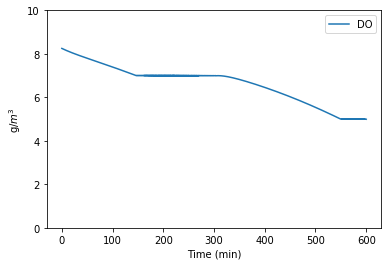

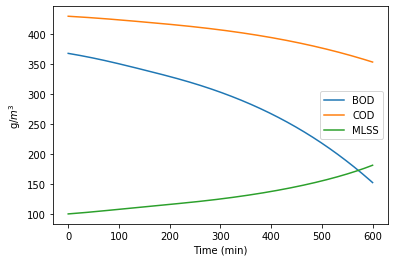

After 0.4166666666666667 days operation
SI = 30.0
SS = 142.2686137501135
XI = 15.0
XS = 10.07735044223918
XH = 154.78414708597305
XA = 0.0
XP = 1.398134912440153
SO = 4.995464870613423
SNO = 7.122071780838028e-18
SNH = 10.001001113199504
SND = 4.527702660917768
XND = 1.2232554100223745
ALK = 5.0715000795142435


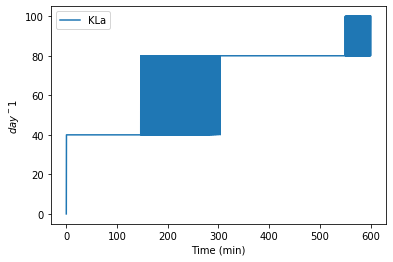

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
line = plt.plot(24*60*timerange, np.array(conc[:,7]), '-', label='DO')
plt.ylim([0,10])
plt.legend()
plt.ylabel('g/$m^3$')
plt.xlabel('Time (min)')
plt.show()
plt.figure(2)
line1 = plt.plot(24*60*timerange, np.array(conc[:,1]+conc[:,3]), '-', label='BOD')
line2 = plt.plot(24*60*timerange, np.array(conc[:,0]+conc[:,1]+conc[:,2]+conc[:,3]+conc[:,4]+conc[:,5]+conc[:,6]), '-', label='COD')
line3 = plt.plot(24*60*timerange, np.array(conc[:,2]+conc[:,3]+conc[:,4]+conc[:,5]+conc[:,6]), '-', label='MLSS')
plt.legend()
plt.ylabel('g/$m^3$')
plt.xlabel('Time (min)')
plt.show()
print('After',T,'days operation')
print('SI =',conc[-1][0])
print('SS =',conc[-1][1])
print('XI =',conc[-1][2])
print('XS =',conc[-1][3])
print('XH =',conc[-1][4])
print('XA =',conc[-1][5])
print('XP =',conc[-1][6])
print('SO =',conc[-1][7])
print('SNO =',conc[-1][8])
print('SNH =',conc[-1][9])
print('SND =',conc[-1][10])
print('XND =',conc[-1][11])
print('ALK =',conc[-1][12])
plt.figure(3)
line1 = plt.plot(24*60*timerange,KLaarray, '-', label='KLa')
plt.legend()
plt.ylabel('$day^-1$')
plt.xlabel('Time (min)')
plt.show()